# [실습] 이변량분석 종합실습

## 환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

# 1.범주형 Y

## 1.1 타이타닉 탑승객 데이터 : 기본

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [23]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
target = 'Survived'

### (1) 숫자형 X --> 범주형 Y

* 그래프 : histogram, densityplot
* 수치화 : 로지스틱회귀  
* 관계 평가

#### ① Age --> Survived

1) 그래프 : histogram, densityplot

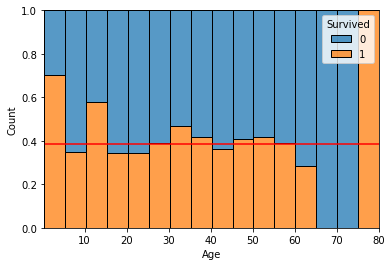

In [34]:

sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

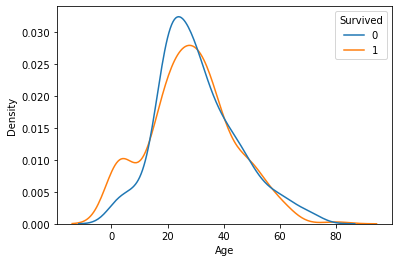

In [15]:
sns.kdeplot(x='Age', data = titanic, hue =target , common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [32]:
temp = titanic.loc[titanic['Age'].notnull()]

model = sm.Logit(temp['Survived'], temp['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.672504
         Iterations 4
Age    9.909841e-08
dtype: float64


3) 관계 평가하기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


4) 추가 분석할 내용 정리

#### ② Fare --> Survived

1) 그래프 : histogram, densityplot

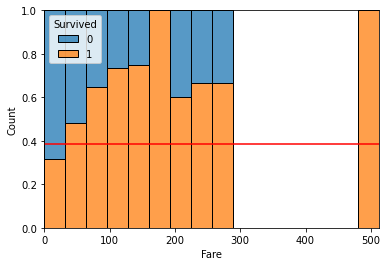

In [33]:
sns.histplot(x='Fare', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

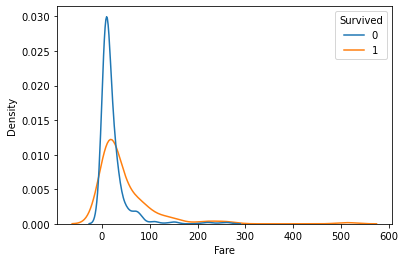

In [26]:
sns.kdeplot(x='Fare', data = titanic, hue =target , common_norm = False)
plt.show()

2) 수치화 : 로지스틱회귀

In [27]:

model = sm.Logit(titanic['Survived'], titanic['Fare'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4
Fare    0.014925
dtype: float64


3) 관계 평가하기

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 범주형 Y

* 교차표(pd.crosstab())
* 시각화( Stacked Bar, Mosaic)
* 가설검정(카이제곱검정)
* 관계 평가

#### ① Sex --> Survived

1) 교차표(pd.crosstab())

In [28]:
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


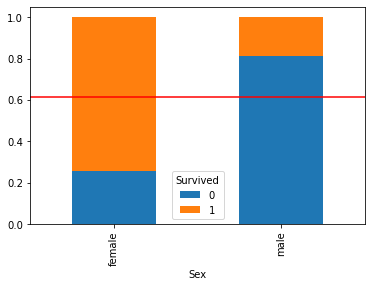

In [29]:
temp = pd.crosstab(titanic['Sex'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

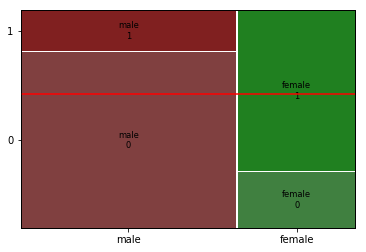

In [30]:
mosaic(titanic, [ 'Sex','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [31]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Sex'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Sex       female  male
Survived              
0             81   468
1            233   109
----------------------------------------------------------------------------------------------------
카이제곱통계량 260.71702016732104
p-value 1.1973570627755645e-58
기대빈도
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


4) 관계 평가하기

5) 추가 분석하기

#### ② Pclass --> Survived

1) 교차표(pd.crosstab())

In [35]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


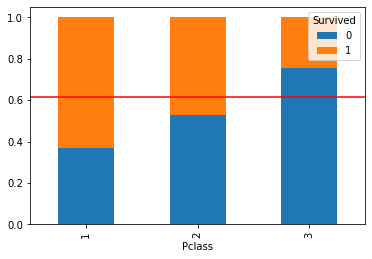

In [36]:
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

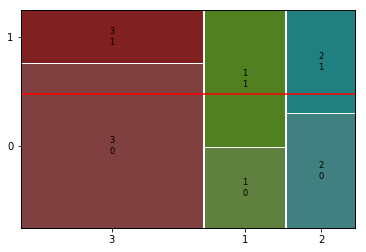

In [38]:
mosaic(titanic, [ 'Pclass','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [37]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


4) 관계 평가하기

5) 추가 분석하기

#### ③ Embarked --> Survived

1) 교차표(pd.crosstab())

In [39]:
pd.crosstab(titanic['Survived'], titanic['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


2) 시각화( Stacked Bar, Mosaic)

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


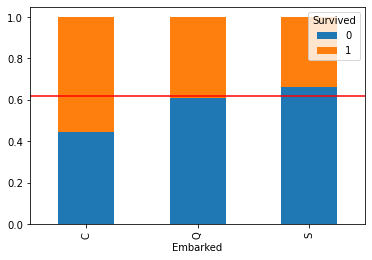

In [40]:
temp = pd.crosstab(titanic['Embarked'], titanic['Survived'], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

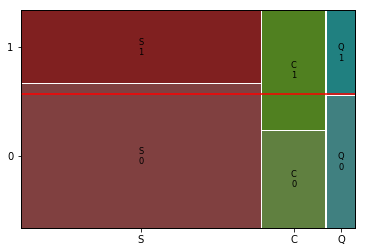

In [41]:
mosaic(titanic, [ 'Embarked','Survived'])
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

3) 가설검정(카이제곱검정)

In [42]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Embarked'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
----------------------------------------------------------------------------------------------------
카이제곱통계량 26.48914983923762
p-value 1.769922284120912e-06
기대빈도
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


4) 관계 평가하기

5) 추가 분석하기

### (3) 관계 정리하기

① 강한관계

* 성별, 객실등급, 운임(범주형)

② 중간관계

* 나이, 승선지역

③ 관계없음

* 없음

# 2.숫자형 Y

## 2.1 보스톤 집값 데이터 : 기본

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수), 단위 1000달라	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [48]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


* target : medv



In [49]:
target = 'medv'

### (1) 숫자형 X --> 숫자형 Y

* 시각화 : scatter, jointplot  
* 수치화 : 상관분석  
* 관계 평가

#### ① crim(범죄율) --> medv(집값)

1) 시각화 : scatter, jointplot 

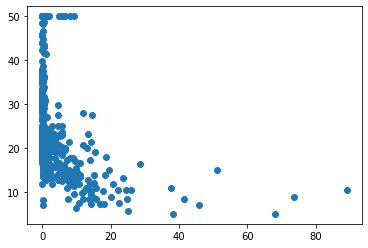

In [51]:
plt.scatter(boston['crim'], boston['medv'])
plt.show()

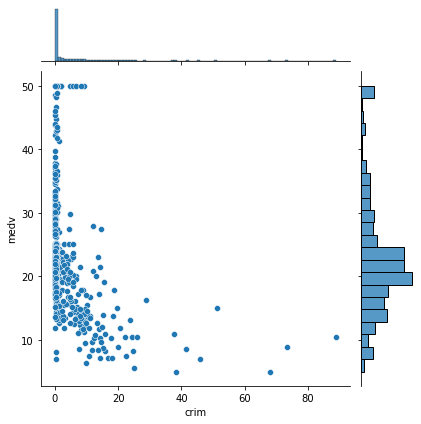

In [52]:
sns.jointplot(x='crim', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [53]:
spst.pearsonr(boston['crim'], boston['medv'])

(-0.3883046085868116, 1.1739870821941207e-19)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ② ptratio(교사학생 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

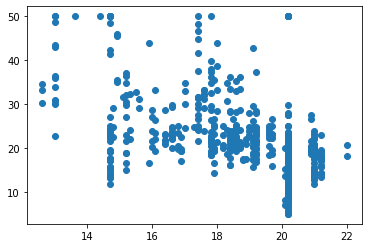

In [74]:
plt.scatter(boston['ptratio'], boston['medv'])
plt.show()

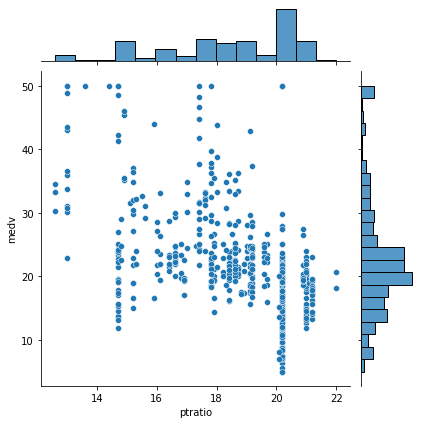

In [56]:
sns.jointplot(x='ptratio', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [61]:
spst.pearsonr(boston['ptratio'], boston['medv'])

(-0.507786685537562, 1.609509478472518e-34)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ③ lstat(하위계층 비율) --> medv(집값)

1) 시각화 : scatter, jointplot 

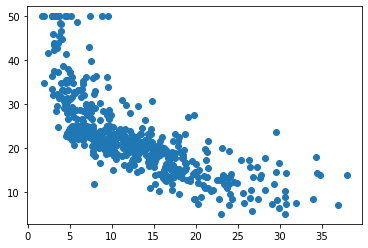

In [62]:
plt.scatter(boston['lstat'], boston['medv'])
plt.show()

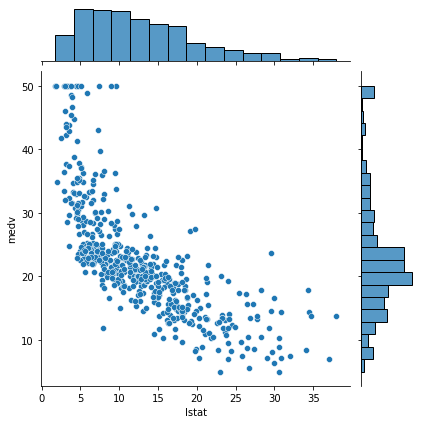

In [63]:
sns.jointplot(x='lstat', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [64]:
spst.pearsonr(boston['lstat'], boston['medv'])

(-0.7376627261740148, 5.08110339438697e-88)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ④ 추가1 --> medv(집값)

1) 시각화 : scatter, jointplot 

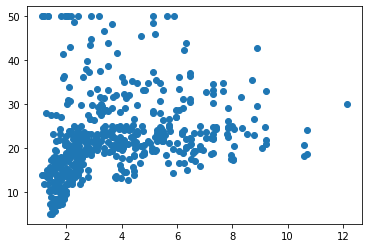

In [75]:
plt.scatter(boston['dis'], boston['medv'])
plt.show()

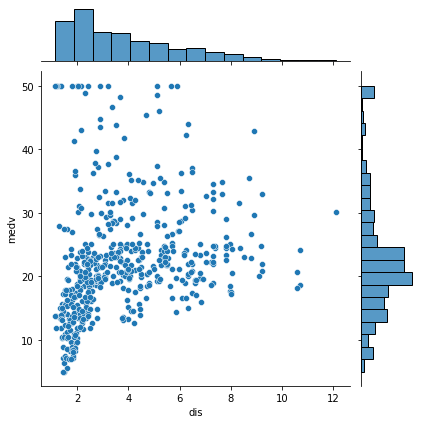

In [76]:
sns.jointplot(x='dis', y='medv', data = boston)
plt.show()

2) 수치화 : 상관분석

In [77]:
spst.pearsonr(boston['dis'], boston['medv'])

(0.24992873408590396, 1.2066117273368359e-08)

3) 관계 평가하기

In [ ]:
Istat,ptratio, crime, dis 순으로 관계가 강하다.

4) 추가 분석할 내용 정리

### (2) 범주형 X --> 숫자형 Y

* 시각화 : 평균비교 barplot
* 수치화 : t-test, anova
* 관계 평가

#### ① chas(찰스강변) --> medv(집값)

1) 시각화 : 평균비교 barplot

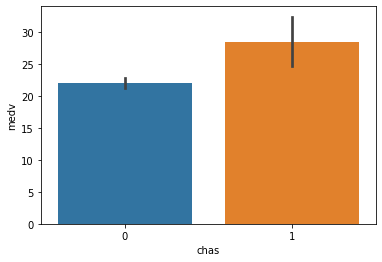

In [65]:
sns.barplot(x="chas", y="medv", data=boston)
plt.show()

2) 수치화 : t-test

In [69]:
temp = boston.loc[boston['medv'].notnull()]
died = temp.loc[temp['chas']==0, 'medv']
survived = temp.loc[temp['chas']==1, 'medv']


In [71]:
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

3) 관계 평가하기

4) 추가 분석할 내용 정리

#### ① zn2(대저택 비율 범주, 0,1,2) --> medv(집값)

1) 시각화 : 평균비교 barplot

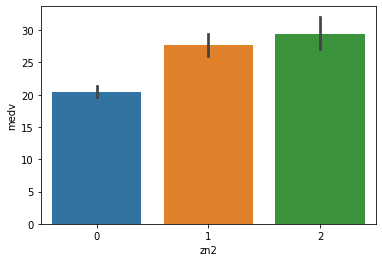

In [66]:
sns.barplot(x="zn2", y="medv", data=boston)
plt.show()

2) 수치화 : anova

In [72]:
P_1 = boston.loc[boston.zn2 == 0, 'medv']
P_2 = boston.loc[boston.zn2 == 1, 'medv']
P_3 = boston.loc[boston.zn2 == 2, 'medv']

In [73]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=41.56175654117286, pvalue=1.9727794047741185e-17)

3) 관계 평가하기

4) 추가 분석할 내용 정리

### (3) 관계 정리하기

① 강한관계

② 중간관계

③ 관계없음

## 2.2 car seat 매출 분석 : 심화

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|


In [78]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop(['Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [ ]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### ① Advertising -> Sales

1) 시각화 : scatter(regplot), jointplot

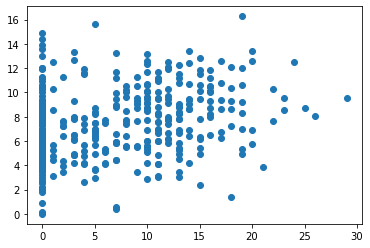

In [79]:
plt.scatter(data['Advertising'], data['Sales'])
plt.show()

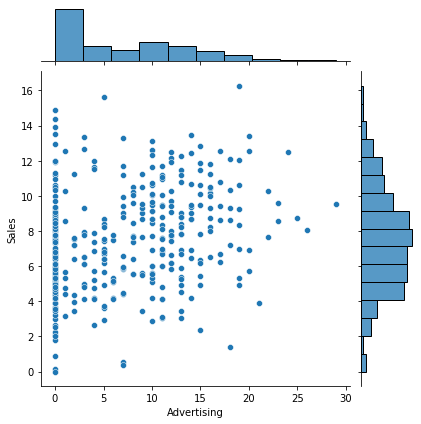

In [80]:
sns.jointplot(x='Advertising', y='Sales', data = data)
plt.show()

In [ ]:
sns.regplot(x='Advertising', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [81]:
spst.pearsonr(data['Advertising'], data['Sales'])

(0.269506781376902, 4.377677110302732e-08)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② Population -> Sales

1) 시각화 : scatter(regplot), jointplot

In [ ]:
plt.scatter(data['Population'], data['Sales'])
plt.show()

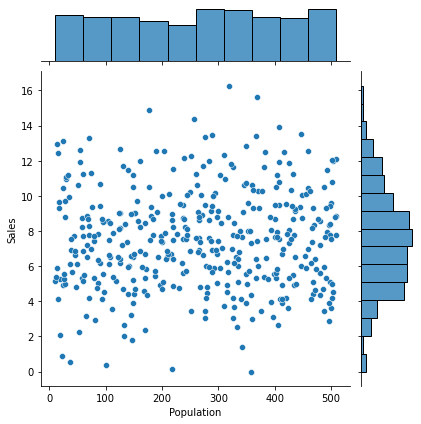

In [97]:
sns.jointplot(x='Population', y='Sales', data = data)
plt.show()

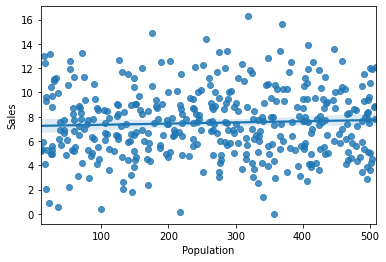

In [98]:
sns.regplot(x='Population', y = 'Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [ ]:
spst.pearsonr(data['Population'], data['Sales'])

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ③ Price -> Sales

1) 시각화 : scatter(regplot), jointplot

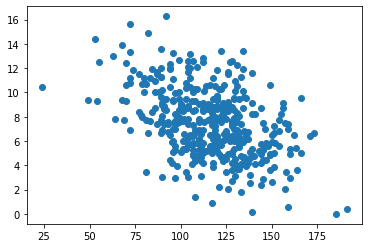

In [83]:
plt.scatter(data['Price'], data['Sales'])
plt.show()

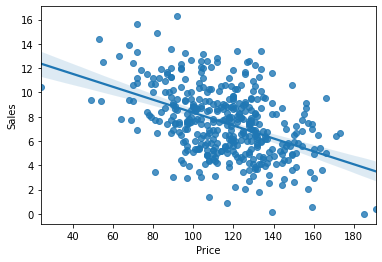

In [82]:
sns.regplot(x='Price', y = 'Sales', data = data)
plt.show()

In [ ]:
sns.jointplot(x='Price', y='Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [91]:
spst.pearsonr(data['Price'], data['Sales'])

data.corr()

,Sales,CompPrice,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.024199,-0.094707,0.584848,-0.100239
Advertising,0.269507,-0.024199,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004557,-0.042663,-0.102177,1.000000


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ④ Age -> Sales

1) 시각화 : scatter(regplot), jointplot

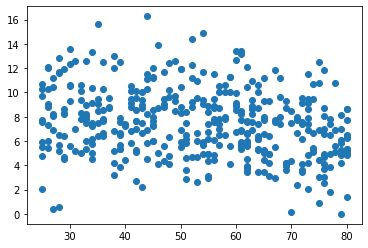

In [96]:
plt.scatter(data['Age'], data['Sales'])
plt.show()

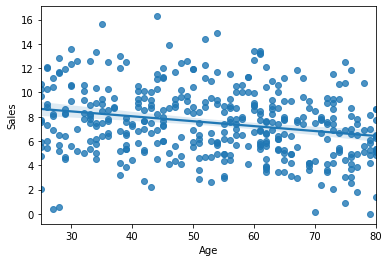

In [95]:
sns.regplot(x='Age', y = 'Sales', data = data)
plt.show()

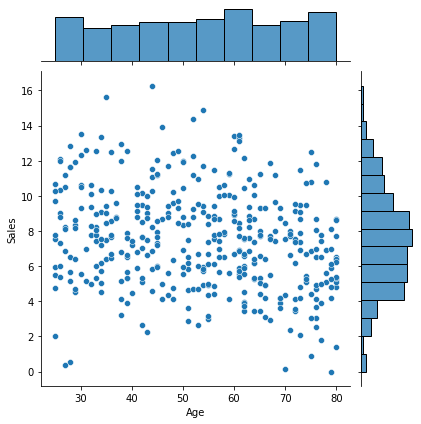

In [99]:
sns.jointplot(x='Age', y='Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [92]:
spst.pearsonr(data['Age'], data['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ⑤ CompPrice -> Sales

1) 시각화 : scatter(regplot), jointplot

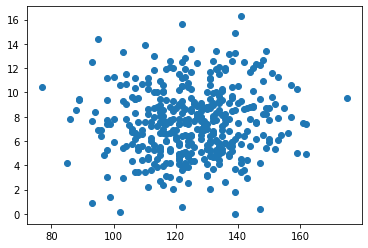

In [86]:
plt.scatter(data['CompPrice'], data['Sales'])
plt.show()

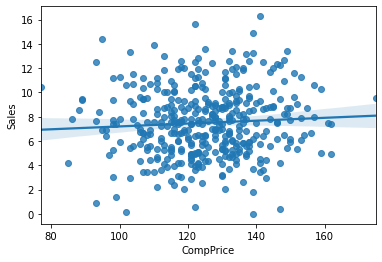

In [93]:
sns.regplot(x='CompPrice', y = 'Sales', data = data)
plt.show()

In [ ]:
sns.jointplot(x='CompPrice', y='Sales', data = data)
plt.show()

2) 수치화 : 상관분석

In [94]:
spst.pearsonr(data['CompPrice'], data['Sales'])

(0.06407872955062152, 0.2009398289418295)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### ① ShelveLoc-> Sales

1) 시각화 : 평균비교 barplot

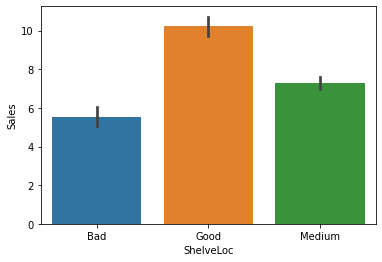

In [87]:
sns.barplot(x="ShelveLoc", y="Sales", data=data)
plt.show()

2) 수치화 : t-test, anova

In [88]:
P_1 = data.loc[data.ShelveLoc == 'Bad', 'Sales']
P_2 = data.loc[data.ShelveLoc == 'Good', 'Sales']
P_3 = data.loc[data.ShelveLoc == 'Medium', 'Sales']
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

#### ② US-> Sales

1) 시각화 : 평균비교 barplot

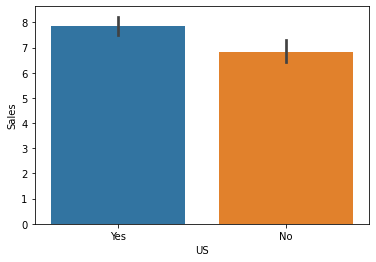

In [89]:
sns.barplot(x="US", y="Sales", data=data)
plt.show()

2) 수치화 : t-test, anova

In [90]:
temp = data.loc[data['Sales'].notnull()]
died = temp.loc[temp['US']=='Yes', 'Sales']
survived = temp.loc[temp['US']=='No', 'Sales']

spst.ttest_ind(died, survived)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### (3) 관계 정리하기

① 강한관계

In [ ]:
ShelveLoc, 

② 중간관계

In [ ]:
Price > Advertising > Age ,      US

③ 관계없음

In [ ]:
CompPrice, Population